In [1]:
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import TensorBoard

In [2]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import TensorBoard
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
cwd = os.getcwd()
print(cwd)
os.listdir(os.getcwd())

C:\Users\alvij\Python\ai_primer


['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'ai_primer',
 'apt.txt',
 'CNN.ipynb',
 'data',
 'DNN.ipynb',
 'Dockerfile',
 'Expand-Archive',
 'fl',
 'Flatland_project.ipynb',
 'flatland_train.data',
 'galbutDNN.ipynb',
 'housing',
 'img',
 'logs',
 'ml-latest',
 'ml-latest-small',
 'ml-latest-small.zip',
 'ml-latest.zip',
 'model.h5',
 'Pipfile',
 'Pipfile.lock',
 'Project.md',
 'Pvz.ipynb',
 'README.md',
 'RF.ipynb',
 'SVD.ipynb',
 'Untitled.ipynb',
 'Varia.ipynb',
 'venv',
 '_config.yml',
 '_toc.yml']

In [4]:
%load_ext tensorboard

In [5]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [6]:
from datetime import datetime

In [7]:
import gzip
import pickle

X, y = pickle.load(gzip.open('flatland_train.data', 'rb'))
y[y != 0] -= 2
X = X / 255.

In [16]:

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[50, 50]))
model.add(keras.layers.Dense(1024, activation="relu"))
model.add(keras.layers.Dense(512, activation="sigmoid"))
model.add(keras.layers.Dense(256, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 2500)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              2561024   
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
Total params: 3,217,152
Trainable params: 3,217,152
Non-trainable params: 0
_________________________________________________________________


In [31]:
loss = model.fit(X, y, epochs=10, validation_split=0.2)  #treniruojam

Epoch 1/10
250/250 [==============================] - 7s 27ms/step - loss: 0.1954 - accuracy: 0.1406 - val_loss: 0.4488 - val_accuracy: 0.1905
Epoch 2/10
250/250 [==============================] - 21s 85ms/step - loss: 0.1735 - accuracy: 0.1427 - val_loss: 0.4998 - val_accuracy: 0.1975
Epoch 3/10
250/250 [==============================] - 13s 54ms/step - loss: 0.1557 - accuracy: 0.1423 - val_loss: 0.4706 - val_accuracy: 0.1370
Epoch 4/10
250/250 [==============================] - 8s 34ms/step - loss: 0.1541 - accuracy: 0.1425 - val_loss: 0.5576 - val_accuracy: 0.1900
Epoch 5/10
250/250 [==============================] - 10s 39ms/step - loss: 0.2007 - accuracy: 0.1389 - val_loss: 0.4983 - val_accuracy: 0.1380
Epoch 6/10
250/250 [==============================] - 10s 38ms/step - loss: 0.1562 - accuracy: 0.1398 - val_loss: 0.4690 - val_accuracy: 0.1315
Epoch 7/10
250/250 [==============================] - 10s 39ms/step - loss: 0.1590 - accuracy: 0.1417 - val_loss: 0.4307 - val_accuracy: 0

In [32]:
model.save('model.h5')

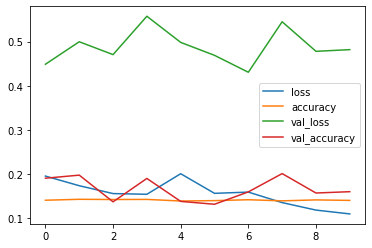

In [33]:
pd.DataFrame(loss.history).plot()

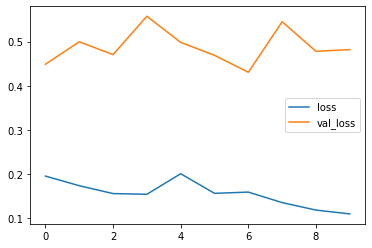

In [34]:
pd.DataFrame(loss.history)[['loss','val_loss']].plot()

In [35]:
pred = model.predict(X).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y).mean()))

Accuracy on test set - 93.42%


In [36]:
model.save('model.h5')

In [37]:
import gzip
import pickle

def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).numpy().argmax(axis=1) == y)
    return acc

model = keras.models.load_model('model.h5')
evaluate('flatland_train.data', model)

0.9342